# Clasificadores lineales

La regla de decisión MAP para regresión logística binaria puede expresarse en función de la logodds como sigue:
$$\begin{align*}
f(\boldsymbol{x})%
&=\mathbb{I}(p(y=1\mid\boldsymbol{x})>p(y=0\mid\boldsymbol{x}))\\%
&=\mathbb{I}\left(\log\frac{p(y=1\mid\boldsymbol{x})}{p(y=0\mid\boldsymbol{x})}>0\right)\\%
&=\mathbb{I}(a>0)\quad\text{con}\quad a=\boldsymbol{w}^t\boldsymbol{x}+b%
\end{align*}$$
Por tanto, esta regla viene a ser una función predictora lineal,
$$f(\boldsymbol{x};\boldsymbol{\theta})=b+\boldsymbol{w}^t\boldsymbol{x}=b+\sum_{d=1}^D w_dx_d$$
que separa el espacio de entrada en dos partes mediante una frontera hiperplanar,
$$\boldsymbol{w}^t\boldsymbol{x}+b=0$$

**Ejemplo:** $\;\boldsymbol{w}=(2, 1, 2)^t\;$ y $\;b=0$; $\;$ frontera $\;2x_1+x_2+2x_3+0=0$

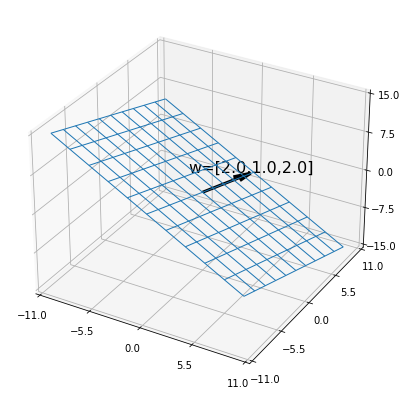

In [1]:
import numpy as np
import matplotlib.pyplot as plt
w1, w2, w3, b = 2.0, 1.0, 2.0, 0.0
x1, x2 = np.meshgrid(np.linspace(-10, 10, 11), np.linspace(-10, 10, 11))
x3 = lambda x1, x2: (-w1 * x1  - w2 * x2 - b) / w3
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x1, x2, x3(x1, x2), rstride=1, cstride=1, linewidth=1)
scaw = 2.0; ax.quiver(0, 0, x3(0, 0), scaw * w1, scaw * w2, scaw * w3, linewidth=3, colors='black')
ax.text(scaw * w1, scaw * w2, scaw * w3, f"w=[{w1},{w2},{w3}]", fontsize=16, ha='center')
x_min, x_max = ax.get_xlim(); ax.set_xticks(np.linspace(x_min, x_max, 5))
y_min, y_max = ax.get_ylim(); ax.set_yticks(np.linspace(y_min, y_max, 5))
z_min, z_max = ax.get_zlim(); ax.set_zticks(np.linspace(z_min, z_max, 5));

## Separabilidad lineal

Decimos que las muestras (de entrenamiento) son **linealmente separables** si pueden separarse mediante un hiperplano

**Ejemplo:** virgínica y no-virgínica no son separables con longitud y amplitud de pétalos

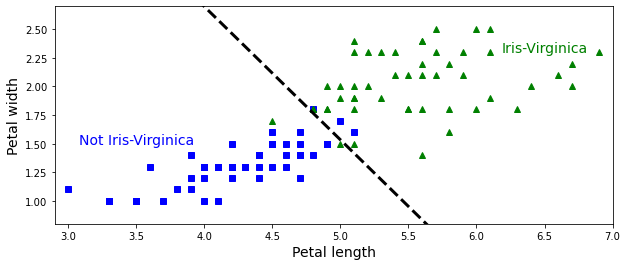

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = np.array(iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
log_reg = LogisticRegression(solver="lbfgs").fit(X, y)
plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7]);